In [2]:
!pip install yfinance

In [4]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 487.3 kB/s eta 0:00:0000:0100:01


In [6]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [8]:
# Get the data for dabur
ticker = "DABUR.BO"  

# Download the data
data = yf.download(ticker, start="2021-01-01", end="2024-02-22")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1248.18
Distribution:                  Normal   AIC:                           2502.37
Method:            Maximum Likelihood   BIC:                           2516.26
                                        No. Observations:                  758
Date:                Thu, Jul 25 2024   Df Residuals:                      757
Time:                        22:27:27   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0295  4.405e-02      0.669      0.504 [-5.68

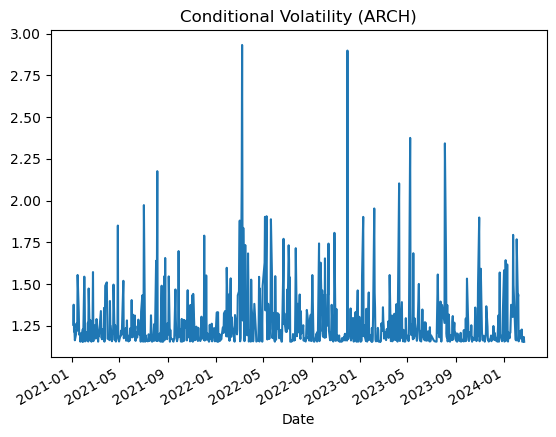

In [10]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1248.18
Distribution:                  Normal   AIC:                           2504.37
Method:            Maximum Likelihood   BIC:                           2522.89
                                        No. Observations:                  758
Date:                Thu, Jul 25 2024   Df Residuals:                      757
Time:                        22:27:43   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0295  4.587e-02      0.643      0.520 [-6.04

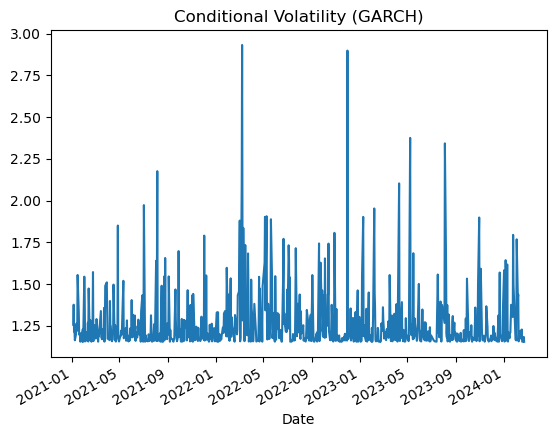

In [12]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

In [14]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Iteration:     10,   Func. Count:     56,   Neg. LLF: 1248.1838279172773
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1248.183827895003
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10


In [16]:
forecasts = res.forecast()

In [18]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [20]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-02-15,545.250000,547.500000,541.049988,544.250000,541.927734,10022,0.009180
2024-02-16,545.849976,547.549988,540.849976,544.400024,542.077148,34939,0.027571
2024-02-19,545.000000,550.000000,540.599976,547.799988,545.462585,26306,0.624530
2024-02-20,550.049988,550.250000,542.950012,547.849976,545.512390,28780,0.009131
2024-02-21,547.849976,549.750000,544.349976,545.900024,543.570740,39595,-0.355931


In [22]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-02-21  0.029484
                 h.1
Date                
2024-02-21  1.360466
                 h.1
Date                
2024-02-21  1.360466


In [24]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05     h.06  \
Date                                                                    
2024-02-21  1.360466  1.587202  1.629621  1.637557  1.639042  1.63932   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-02-21  1.639372  1.639382  1.639383  1.639384  ...  1.639384  1.639384   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-02-21  1.639384  1.639384  1.639384  1.639384  1.639384  1.639384   

                h.89      h.90  
Date                            
2024-02-21  1.639384  1.639384  

[1 rows x 90 columns]


In [26]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-21,1.360466,1.587202,1.629621,1.637557,1.639042,1.63932,1.639372,1.639382,1.639383,1.639384,...,1.639384,1.639384,1.639384,1.639384,1.639384,1.639384,1.639384,1.639384,1.639384,1.639384


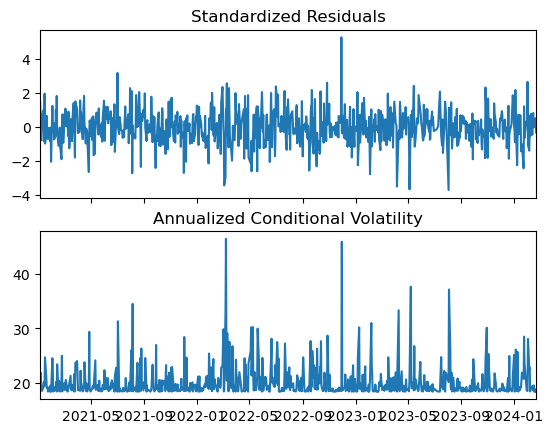

In [28]:
fig = res.plot(annualize="D")